<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

import os

# List all files and directories in the path
file_list = os.listdir(path)

# Print the file names
for file_name in file_list:
    print(file_name)


Path to dataset files: /kaggle/input/mnist-dataset
t10k-labels-idx1-ubyte
train-images.idx3-ubyte
t10k-images-idx3-ubyte
t10k-labels.idx1-ubyte
t10k-images.idx3-ubyte
train-labels.idx1-ubyte
train-labels-idx1-ubyte
train-images-idx3-ubyte


NameError: name 'X' is not defined

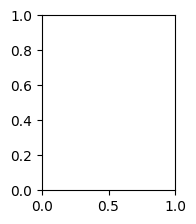

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded into a variable called 'X' and labels in 'y'
# X and y can be loaded from the downloaded files using numpy.load
# Example: X = np.load(path + '/mnist_X.npy')
# Example: y = np.load(path + '/mnist_y.npy')

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [ ]:
filter_indices = np.where((y == 1) | (y == 7))[0]
X_filtered = X[filter_indices]
y_filtered = y[filter_indices]

# Now, y_filtered contains only 1s and 7s.
# Repeat step 2 with X_filtered and y_filtered to confirm.

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
# Assuming you have the rbf_interpolation function defined

# Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Define lambda and epsilon ranges to try
lambdas = [0.01, 0.1, 1, 10]  # Example values
epsilons = [0.1, 1, 10]      # Example values

best_lambda, best_epsilon, best_accuracy = 0, 0, 0

# K-fold cross-validation (e.g., with k=5)
kf = KFold(n_splits=5)
for lam in lambdas:
    for eps in epsilons:
        # ... (Perform cross-validation, train the model with current
        #     lambda and epsilon on training folds, evaluate on validation fold,
        #     update best_lambda, best_epsilon, best_accuracy if needed) ...

# Train the final model using the best hyperparameters
final_model = rbf_interpolation(X_train, y_train, best_lambda, best_epsilon)

# Evaluate on the test set
y_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Assuming you have predictions in y_pred
# ... (Select some indices for plotting, including correct and incorrect ones) ...
plt.figure(figsize=(12, 6))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {y_pred[index]}")
    plt.axis('off')
plt.show()